<a href="https://colab.research.google.com/github/JaviCeRodriguez/Intro_Ciencia_Datos/blob/main/Parcial/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install geopandas shapely folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 35.0 MB/s 
     |████████████████████████████████| 16.7 MB 416 kB/s 


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt

In [3]:
!wget https://raw.githubusercontent.com/JaviCeRodriguez/Intro_Ciencia_Datos/main/Parcial/arbolado-publico-lineal-2017-2018.csv
!wget https://raw.githubusercontent.com/JaviCeRodriguez/Intro_Ciencia_Datos/main/Parcial/barrios.csv

--2022-10-16 02:22:02--  https://raw.githubusercontent.com/JaviCeRodriguez/Intro_Ciencia_Datos/main/Parcial/arbolado-publico-lineal-2017-2018.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59724431 (57M) [text/plain]
Saving to: ‘arbolado-publico-lineal-2017-2018.csv’

arbolado-publico-li 100%[===================>]  56.96M   112MB/s    in 0.5s    

2022-10-16 02:22:03 (112 MB/s) - ‘arbolado-publico-lineal-2017-2018.csv’ saved [59724431/59724431]

--2022-10-16 02:22:03--  https://raw.githubusercontent.com/JaviCeRodriguez/Intro_Ciencia_Datos/main/Parcial/barrios.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185

In [4]:
df_arbolado = pd.read_csv('arbolado-publico-lineal-2017-2018.csv')
df_arbolado.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


- Ceibo: Erythrina crista-galli
- Jacarandá: Jacaranda mimosifolia
- Palo borracho: Ceiba speciosa
- Tipa: Tipuana tipu
- Timbó: Enterolobium contortisiliquum
- Ibirá-pitá: Peltophorum dubium
- Guarán -guarán: Tecoma stans
- Aliso de río: Tessaria integrifolia (este no esta en el de arbolado lineal)
- Sauce criollo: Salix humboldtiana
- Aguaribay: Schinus molle
- Curupí: Sapium haematospermum
- Ombú: Phytolacca dioica
- Fumo Bravo: Solanum granulosum-leprosum
- Lapacho: Handroanthus impetiginosus

In [5]:
especies_nativas = {
    "Ceibo": "Erythrina crista-galli",
    "Jacarandá": "Jacaranda mimosifolia", 
    "Palo borracho": "Ceiba speciosa", 
    "Tipa": "Tipuana tipu",
    "Timbó": "Enterolobium contortisiliquum", 
    "Ibirá-pitá": "Peltophorum dubium", 
    "Guarán -guarán": "Tecoma stans", 
    "Sauce criollo": "Salix humboldtiana",
    "Aguaribay": "Schinus molle", 
    "Curupí": "Sapium haematospermum", 
    "Ombú": "Phytolacca dioica",
    "Fumo Bravo": "Solanum granulosum-leprosum", 
    "Lapacho": "Handroanthus impetiginosus"
}
df_arbolado_nativos = df_arbolado[df_arbolado["nombre_cientifico"].isin(especies_nativas.values())]

Jacaranda mimosifolia         13872
Tipuana tipu                   9330
Ceiba speciosa                 1796
Handroanthus impetiginosus     1365
Tecoma stans                    822
Erythrina crista-galli          618
Peltophorum dubium              604
Name: nombre_cientifico, dtype: int64


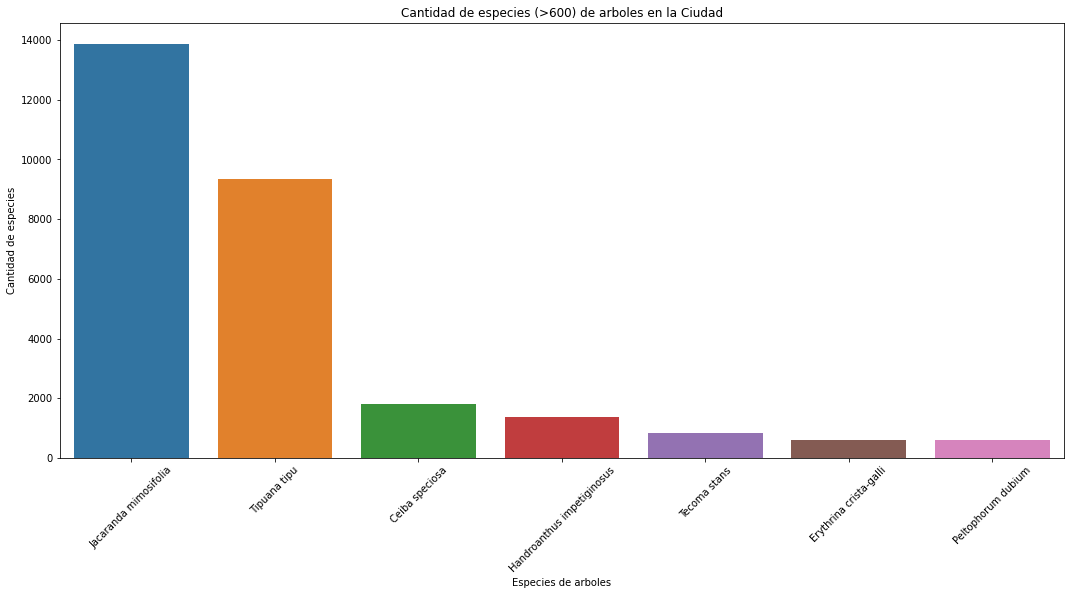

In [6]:
df_arboles_count = df_arbolado_nativos["nombre_cientifico"].value_counts()
print(df_arboles_count[:7])

fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x=df_arboles_count[:7].index, y=df_arboles_count[:7], ax=ax)
# ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
ax.set(ylabel='Cantidad de especies', xlabel='Especies de arboles', title="Cantidad de especies (>600) de arboles en la Ciudad")
plt.xticks(rotation=45);

In [8]:
df_arbolado_nativos = df_arbolado_nativos[df_arbolado_nativos["nombre_cientifico"].isin(df_arboles_count[:7].index)]
df_arbolado_nativos.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0
7,-58.373356,-34.594871,31864,Lineal,1,NaN,Reconquista,1100.0,1126.0,RECONQUISTA 1126,En frente,Jacaranda mimosifolia,NaN,Ocupada,NaN,A nivel,8.0,3.0
8,-58.380812,-34.591559,31354,Lineal,1,NaN,Arroyo,900.0,940.0,ARROYO 940,Exacta,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,38.0,15.0


In [15]:
# df_arbolado_nativos["tipo_activ"].unique() # deletear
# df_arbolado_nativos["estado_plantera"].unique() # Ver ocupacion y coordenadas con el de abajo
# df_arbolado_nativos["ubicacion_plantera"].unique() # Ojo aca con las ochavas
df_nativos_planteras = df_arbolado_nativos[df_arbolado_nativos["estado_plantera"].isin(['Ocupada', 'Ocupada ', 'Cantero ocupado', 'Sobreocupada', 'sobreocupada', 'Sobreocupada parc. cerrada'])]
df_nativos_planteras = df_nativos_planteras[df_arbolado_nativos["ubicacion_plantera"].isin(['Ochava', 'ochava', 'Fuera de Línea, Ochava'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Jacaranda mimosifolia         563
Tipuana tipu                  463
Ceiba speciosa                148
Handroanthus impetiginosus     57
Erythrina crista-galli         44
Tecoma stans                   28
Peltophorum dubium             26
Name: nombre_cientifico, dtype: int64


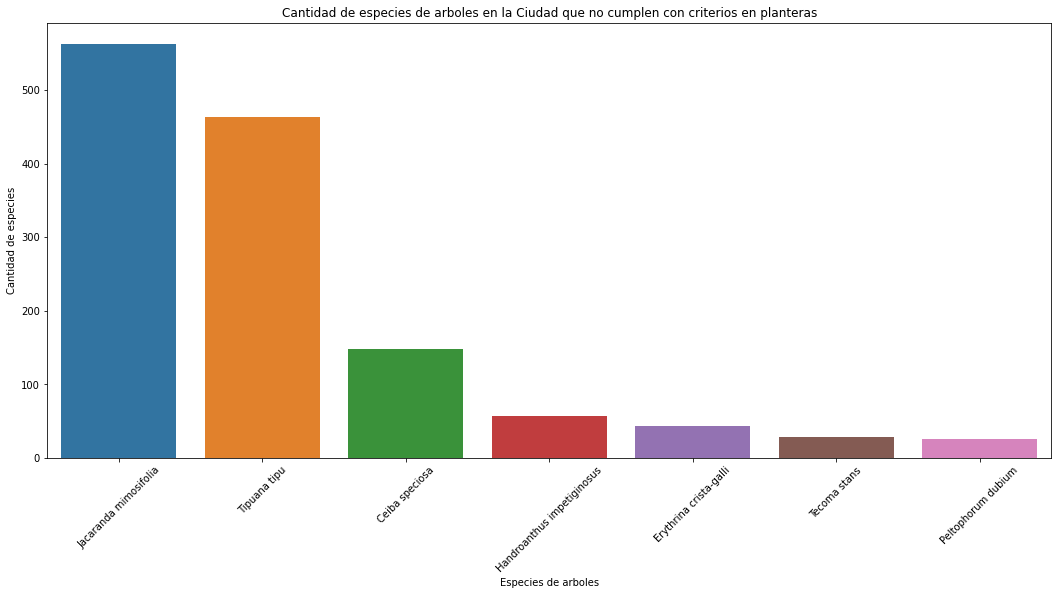

In [16]:
df_nativos_planteras_count = df_nativos_planteras["nombre_cientifico"].value_counts()
print(df_nativos_planteras_count)

fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x=df_nativos_planteras_count.index, y=df_nativos_planteras_count, ax=ax)
# ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
ax.set(ylabel='Cantidad de especies', xlabel='Especies de arboles', title="Cantidad de especies de arboles en la Ciudad que no cumplen con criterios en planteras")
plt.xticks(rotation=45);

In [17]:
gdf_arbolado = gpd.GeoDataFrame(df_nativos_planteras, geometry=gpd.points_from_xy(df_nativos_planteras.long, df_nativos_planteras.lat))
gdf_arbolado.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,geometry
180,-58.377784,-34.608005,47584,Lineal,1,NaN,Esmeralda,NaN,5.0,ESMERALDA 5,En frente,Ceiba speciosa,12,Ocupada,Ochava,A nivel,55.0,10.0,POINT (-58.37778 -34.60800)
367,-58.377784,-34.608005,51295,Lineal,1,NaN,Esmeralda,NaN,5.0,ESMERALDA 5,En frente,Ceiba speciosa,12,Ocupada,Ochava,A nivel,71.0,11.0,POINT (-58.37778 -34.60800)
632,-58.382568,-34.603103,53177,Lineal,1,NaN,"Saenz Peña Roque,Pres. Diagonal Norte Av.",1100.0,1111.0,"SAENZ PEÑA, ROQUE, PRES. DIAGONAL NORTE AV. 1111",LD,Jacaranda mimosifolia,6,Ocupada,Ochava,Bajo nivel,20.0,7.0,POINT (-58.38257 -34.60310)
653,-58.381426,-34.595090,53463,Lineal,1,NaN,Pellegrini Carlos,1100.0,1119.0,"PELLEGRINI, CARLOS 1119",LA,Jacaranda mimosifolia,8.8,Ocupada,Ochava,Bajo nivel,37.0,13.0,POINT (-58.38143 -34.59509)
671,-58.381226,-34.595257,53465,Lineal,1,NaN,Santa Fe Av.,900.0,997.0,SANTA FE AV. 997,LA,Jacaranda mimosifolia,4,Ocupada,Ochava,A nivel,45.0,13.0,POINT (-58.38123 -34.59526)


In [11]:
df_barrios = pd.read_csv('barrios.csv', sep=";")
df_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,MULTIPOLYGON (((-58.4528200492791 -34.59598865...,CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,MULTIPOLYGON (((-58.4655768128541 -34.59655770...,PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,MULTIPOLYGON (((-58.4237529813037 -34.59782733...,VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,MULTIPOLYGON (((-58.4946097568899 -34.61486523...,VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,MULTIPOLYGON (((-58.4128700313088 -34.61411625...,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


In [12]:
df_barrios['WKT'] = df_barrios["WKT"].apply(wkt.loads)
gdf_barrios = gpd.GeoDataFrame(df_barrios, geometry='WKT')

In [13]:
gdf_barrios.head()

,WKT,BARRIO,COMUNA,PERIMETRO,AREA,OBJETO
0,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366...",CHACARITA,15.0,7724.852955,3.115707e+06,BARRIO
1,"MULTIPOLYGON (((-58.46558 -34.59656, -58.46562...",PATERNAL,15.0,7087.513295,2.229829e+06,BARRIO
2,"MULTIPOLYGON (((-58.42375 -34.59783, -58.42495...",VILLA CRESPO,15.0,8131.857075,3.615978e+06,BARRIO
3,"MULTIPOLYGON (((-58.49461 -34.61487, -58.49479...",VILLA DEL PARQUE,11.0,7705.389797,3.399596e+06,BARRIO
4,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282...",ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO


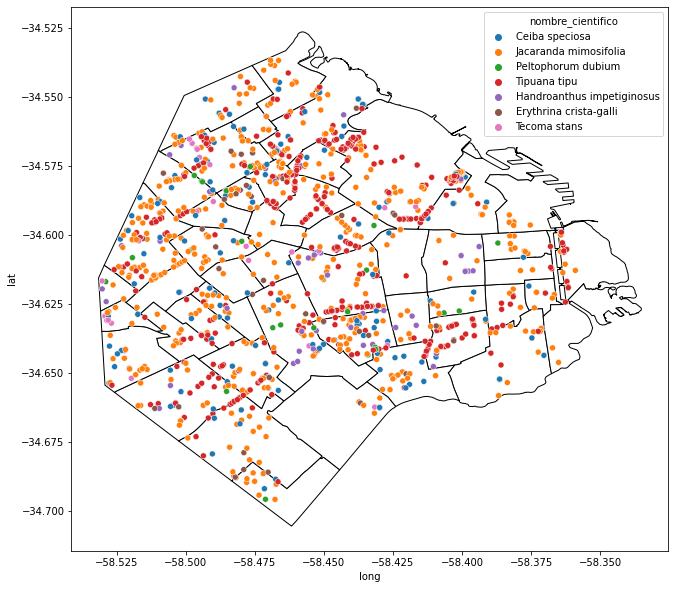

In [18]:
ax_barrios = gdf_barrios.plot(color="white", edgecolor="black", figsize=(40, 10))
sns.scatterplot(data=gdf_arbolado, x="long", y="lat", ax=ax_barrios, hue="nombre_cientifico")